# Load data 

In [18]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from parse_logs import parser
from parse_logs.parse_base import LogDir

sns.set(rc={"figure.figsize":(16, 8)})
# parser.root_data_path = '../tests/data'
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

LogDir.base_data_path = '../data'

# load trials run to dict (it can take a while)
trial_run_objects = parser.get_trial_runs(
    exec_code='experiment_2021_07_16_16_16_05_run_1')
trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]

file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment
file experiment with wrong name format:
not enough values to unpack (expected 2, got 1)
ignoring experiment


In [17]:
# sort and instantiate a dataframe
trial_run_dicts.sort(key=lambda tr: tr['trial_id'])
trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
0,1,aaaaap,les-02,planned,532.683333,NaN,reach-target,678.756781,False,a,a,a,a,a
1,1,aaaaab,les-02,baseline,NaN,NaN,timeout-sim,1105.196014,False,a,a,a,a,a
2,1,aaaaap,les-05,planned,495.766667,NaN,reach-target,610.652392,False,a,a,a,a,a
3,1,aaaaab,les-05,baseline,424.266667,NaN,reach-target,559.581255,False,a,a,a,a,a
4,1,aaaaap,les-04,planned,466.116667,NaN,reach-target,580.636589,False,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,81,accccp,les-08,planned,NaN,NaN,timeout-sim,1103.245536,False,a,c,c,c,c
1275,81,accccb,les-06,baseline,200.716667,NaN,reach-target,238.238989,False,a,c,c,c,c
1276,81,accccp,les-06,planned,358.650000,NaN,reach-target,421.440350,False,a,c,c,c,c
1277,81,accccb,les-07,baseline,194.400000,NaN,reach-target,235.240533,False,a,c,c,c,c


## Baseline

In [ ]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
0,1,aaaaab,les-06,baseline,556.233333,NaN,reach-target,735.794799,False,a,a,a,a,a
1,1,aaaaab,les-05,baseline,424.266667,NaN,reach-target,559.581255,False,a,a,a,a,a
3,1,aaaaab,les-04,baseline,379.300000,NaN,reach-target,519.533063,False,a,a,a,a,a
5,1,aaaaab,les-03,baseline,396.950000,NaN,reach-target,532.560485,False,a,a,a,a,a
8,1,aaaaab,les-08,baseline,347.616667,NaN,reach-target,469.486996,False,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,81,accccb,les-04,baseline,189.916667,NaN,reach-target,239.252352,False,a,c,c,c,c
1189,81,accccb,les-03,baseline,204.066667,NaN,reach-target,245.249477,False,a,c,c,c,c
1191,81,accccb,les-02,baseline,191.566667,NaN,reach-target,227.230592,False,a,c,c,c,c
1192,81,accccb,les-08,baseline,190.883333,NaN,reach-target,239.242548,False,a,c,c,c,c


# Planned

In [ ]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
2,1,aaaaap,les-05,planned,495.766667,NaN,reach-target,610.652392,False,a,a,a,a,a
4,1,aaaaap,les-04,planned,466.116667,NaN,reach-target,580.636589,False,a,a,a,a,a
6,1,aaaaap,les-03,planned,481.383333,NaN,reach-target,604.655203,False,a,a,a,a,a
7,1,aaaaap,les-02,planned,532.683333,NaN,reach-target,678.756781,False,a,a,a,a,a
9,1,aaaaap,les-08,planned,436.816667,NaN,reach-target,549.601302,False,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,80,acccbp,les-07,planned,805.783333,NaN,reach-target,961.068459,False,a,c,c,c,b
1184,81,accccp,les-06,planned,358.650000,NaN,reach-target,421.440350,False,a,c,c,c,c
1186,81,accccp,les-05,planned,423.416667,NaN,reach-target,503.531729,False,a,c,c,c,c
1190,81,accccp,les-02,planned,421.266667,NaN,reach-target,522.553201,False,a,c,c,c,c


In [ ]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

525.9594936808587

In [ ]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.machine == 'les-01']['ttc'].mean(),
planned_df[planned_df.machine == 'les-02']['ttc'].mean(),
planned_df[planned_df.machine == 'les-03']['ttc'].mean())

(526.9577381057678, 532.763846181, 535.0717514288983)

In [ ]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
(planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean())

(nan, nan)

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [ ]:
by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state     treatment
failure-bt    baseline     256
              planned       54
low-battery   baseline       3
              planned        9
reach-target  baseline     334
              planned      479
timeout-wall  baseline      35
              planned       25
Name: end_state, dtype: int64

In [ ]:
trial_run_df.groupby(['trial_id', 'code', 'treatment'])['end_state'].value_counts()

trial_id  code    treatment  end_state   
1         aaaaab  baseline   reach-target    7
          aaaaap  planned    reach-target    5
                             failure-bt      1
2         aaaabb  baseline   reach-target    8
          aaaabp  planned    reach-target    5
                                            ..
80        acccbb  baseline   failure-bt      6
                             timeout-wall    1
          acccbp  planned    reach-target    7
81        accccb  baseline   reach-target    7
          accccp  planned    reach-target    4
Name: end_state, Length: 277, dtype: int64

## Planned

array([<AxesSubplot:title={'center':'failure-bt'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'low-battery'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'reach-target'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'timeout-wall'}, xlabel='trial_id'>],
      dtype=object)

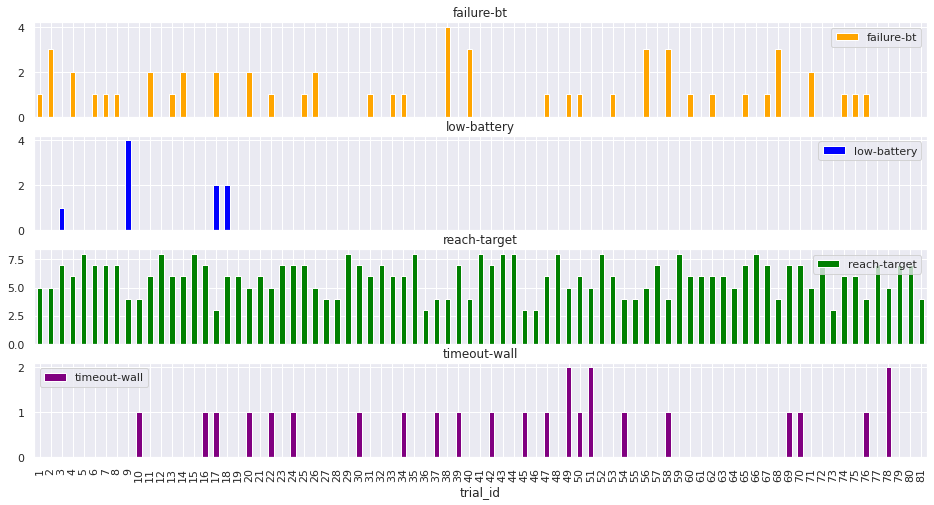

In [ ]:
planned_df.groupby("trial_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True, 
                                                                              color={"reach-target": "green", 
                                                                                     "failure-bt": "orange", 
                                                                                     "timeout": "red",
                                                                                     "low-battery": "blue",
                                                                                     "timeout-wall": "purple"})

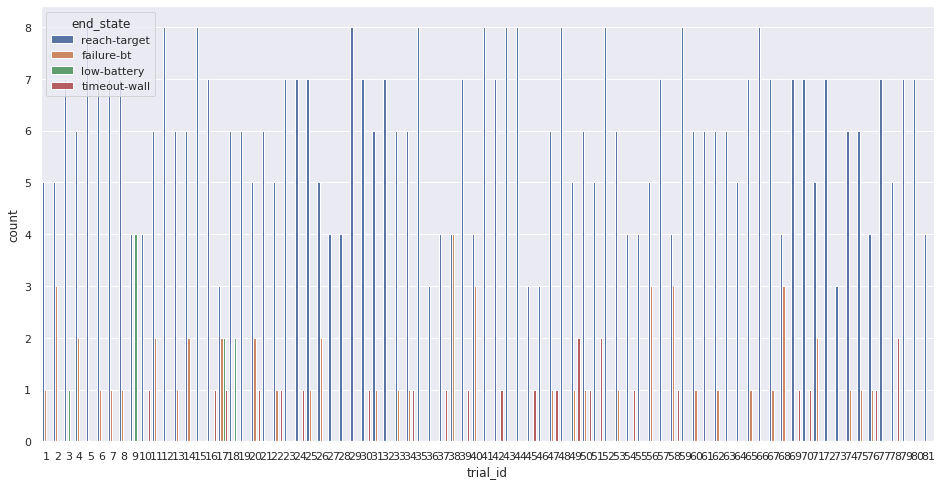

In [ ]:
ax_planned = sns.countplot(x='trial_id', hue="end_state", data=planned_df)

## Baseline

array([<AxesSubplot:title={'center':'failure-bt'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'low-battery'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'reach-target'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'timeout-wall'}, xlabel='trial_id'>],
      dtype=object)

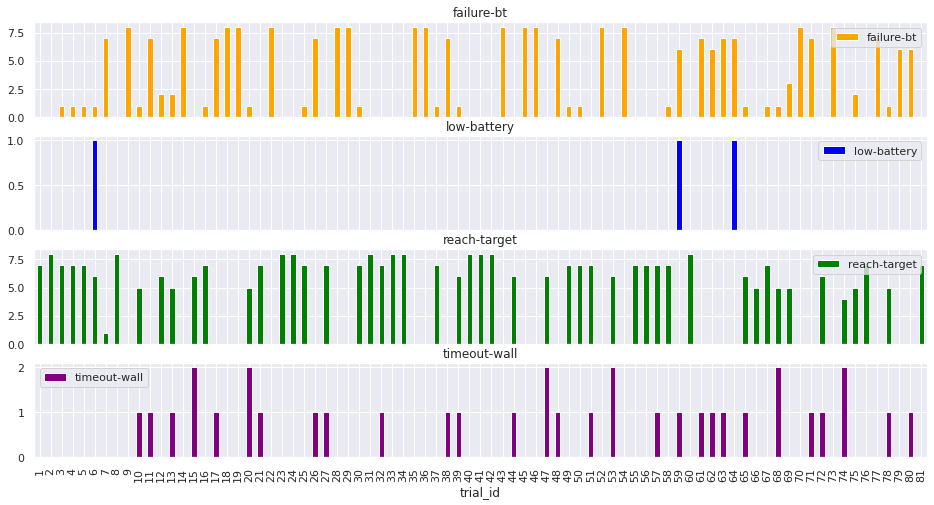

In [ ]:
baseline_df.groupby("trial_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True,
                                                                               color={"reach-target": "green", 
                                                                                      "failure-bt": "orange", 
                                                                                      "timeout": "red",
                                                                                      "low-battery": "blue",
                                                                                      "timeout-wall": "purple"})

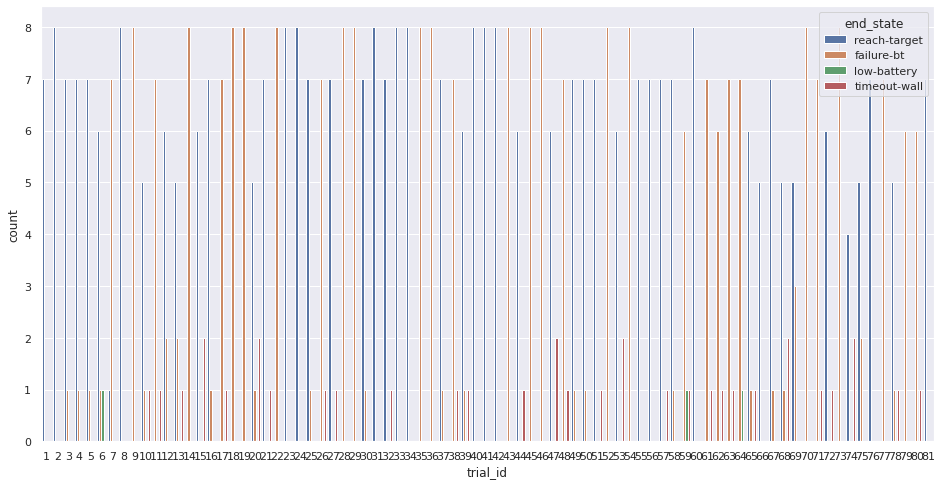

In [ ]:
ax_baseline = sns.countplot(x='trial_id', hue="end_state", data=baseline_df)

## Time to Conclusion

array([<AxesSubplot:title={'center':'baseline'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='trial_id'>],
      dtype=object)

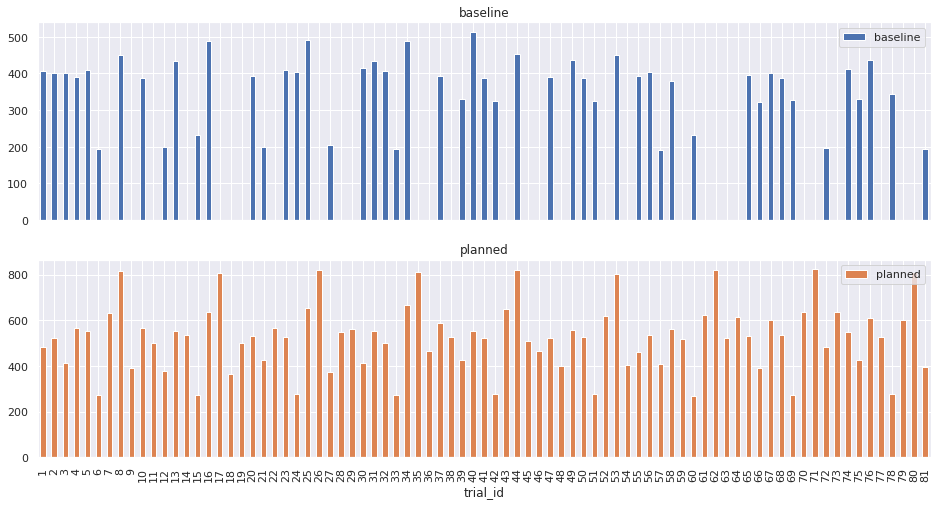

In [ ]:
trial_run_df.groupby(["trial_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='trial_id'>

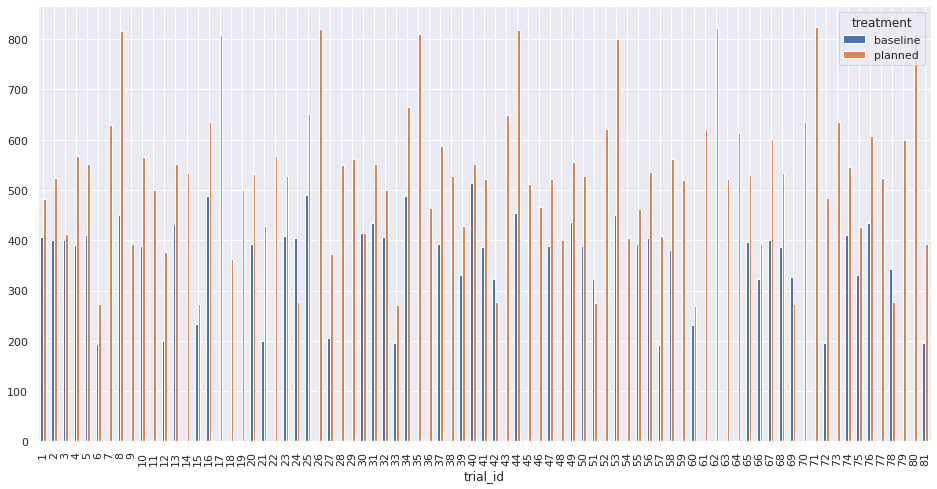

In [ ]:
trial_run_df.groupby(["trial_id", "treatment"])["ttc"].mean().unstack().plot.bar(legend=True, figsize=(16,8))

## STD

array([<AxesSubplot:title={'center':'baseline'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='trial_id'>],
      dtype=object)

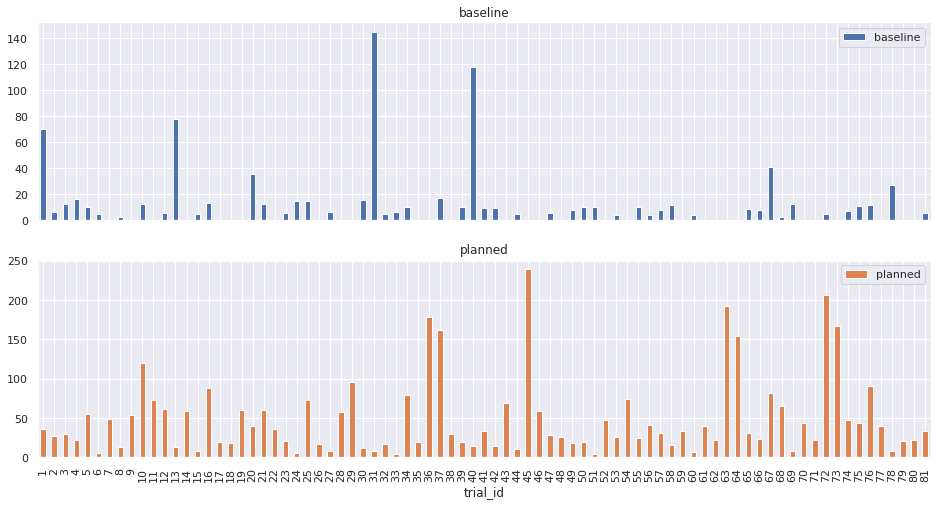

In [ ]:
trial_run_df.groupby(["trial_id", "treatment"])["ttc"].std().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='trial_id'>

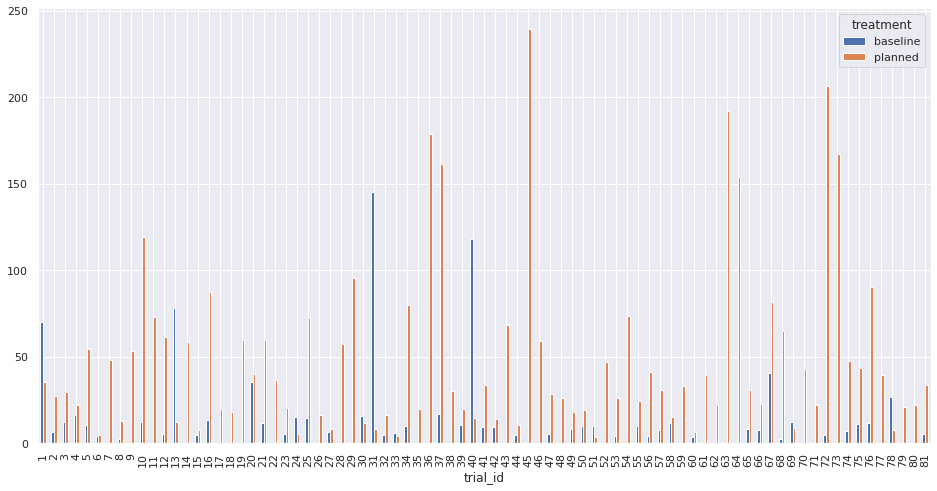

In [ ]:
trial_run_df.groupby(["trial_id", "treatment"])["ttc"].std().unstack().plot.bar(legend=True)

In [ ]:
trial_run_df.groupby(["trial_id", "treatment"])["ttc"].std().unstack()

treatment,baseline,planned
trial_id,,
1,70.315316,35.535140
2,6.405857,27.539697
3,12.484521,29.766700
4,16.536706,22.158203
5,10.455893,54.583108
...,...,...
77,NaN,39.496926
78,26.858202,7.854047
79,NaN,20.747784


# Plots

## Successes per trial

In [ ]:
successes = trial_run_df[trial_run_df.end_state == "reach-target"]

array([<AxesSubplot:title={'center':'baseline'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='trial_id'>],
      dtype=object)

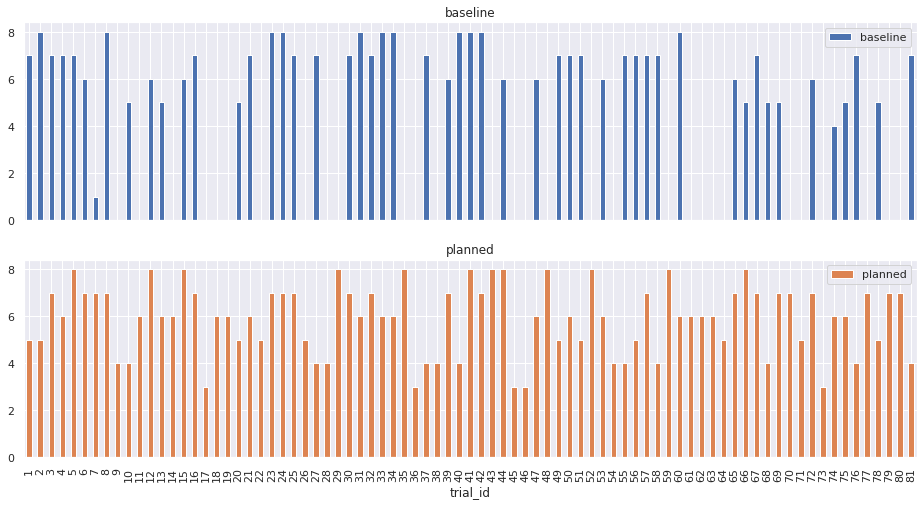

In [ ]:
successes.groupby(["trial_id", "treatment"])["end_state"].count().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='trial_id'>

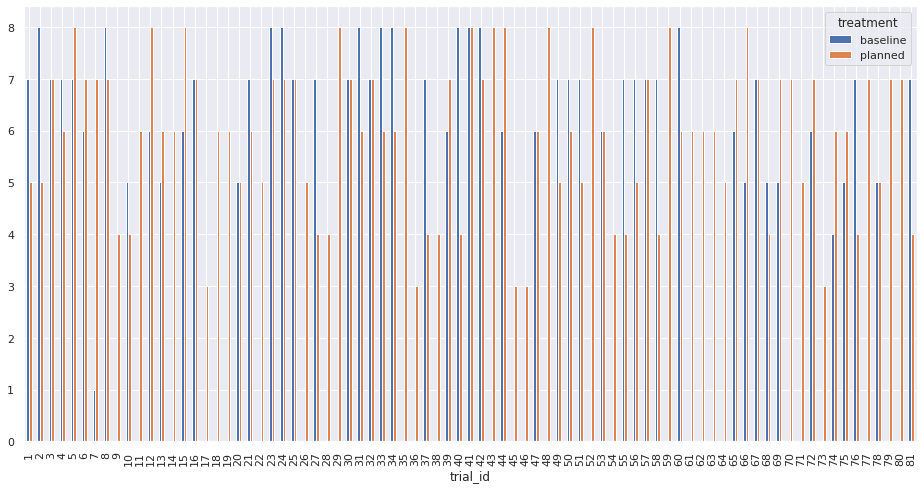

In [ ]:
successes.groupby(["trial_id", "treatment"])["end_state"].count().unstack().plot.bar(legend=True)

### Average time to reach target

<AxesSubplot:xlabel='trial_id'>

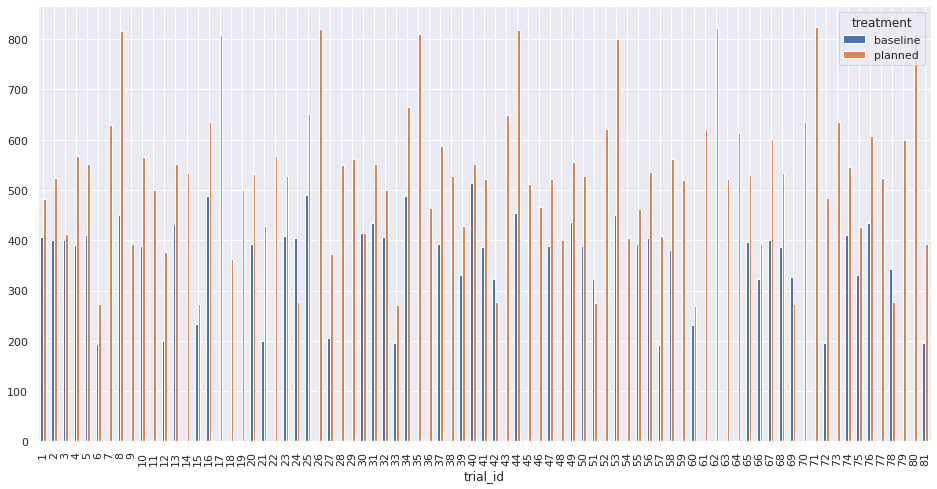

In [ ]:
successes.groupby(["trial_id", "treatment"])["ttc"].mean().unstack().plot.bar(legend=True, figsize=(16,8))

array([<AxesSubplot:title={'center':'baseline'}, xlabel='trial_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='trial_id'>],
      dtype=object)

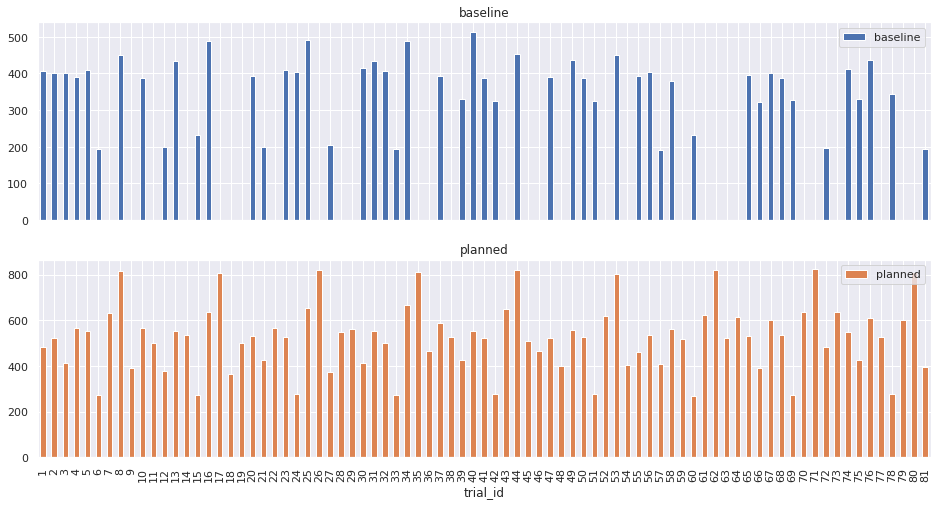

In [ ]:
successes.groupby(["trial_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True, figsize=(16,8))

# Metrics
## Metric1 - Success

In [ ]:
planned_suc = successes[successes.treatment == "planned"].groupby("trial_id")["end_state"].count()
baseline_suc = successes[successes.treatment == "baseline"].groupby("trial_id")["end_state"].count()

In [ ]:
metric1 = planned_suc/baseline_suc
metric1

trial_id
1     0.714286
2     0.625000
3     1.000000
4     0.857143
5     1.142857
        ...   
77         NaN
78    1.000000
79         NaN
80         NaN
81    0.571429
Name: end_state, Length: 81, dtype: float64

<AxesSubplot:xlabel='trial_id'>

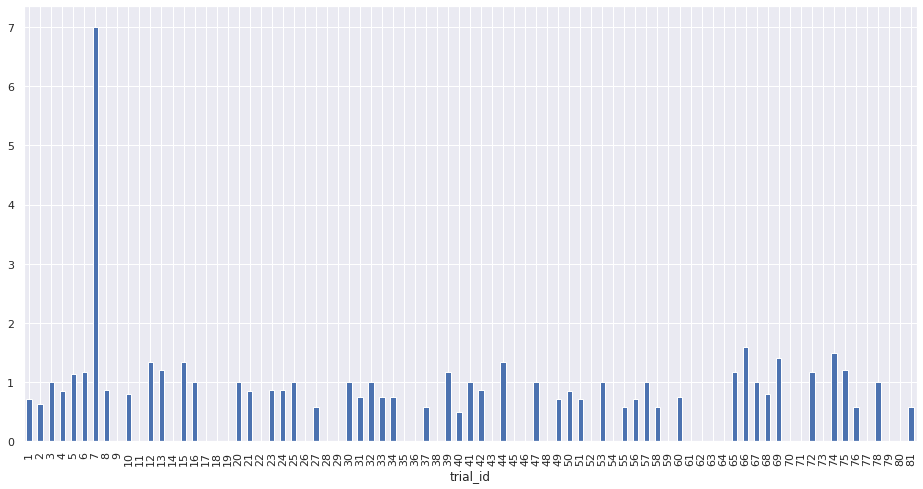

In [ ]:
metric1.plot.bar(figsize=(16, 8))

In [ ]:
metric1.mean()

1.0547385620915033

## Metric2 - TTC

In [ ]:
planned_ttc = successes[successes.treatment == "planned"].groupby("trial_id")["ttc"].mean()
baseline_ttc = successes[successes.treatment == "baseline"].groupby("trial_id")["ttc"].mean()

In [ ]:
metric2 = planned_ttc / baseline_ttc
metric2

trial_id
1     1.184796
2     1.305772
3     1.027994
4     1.450622
5     1.343793
        ...   
77         NaN
78    0.807920
79         NaN
80         NaN
81    2.019084
Name: ttc, Length: 81, dtype: float64

<AxesSubplot:xlabel='trial_id'>

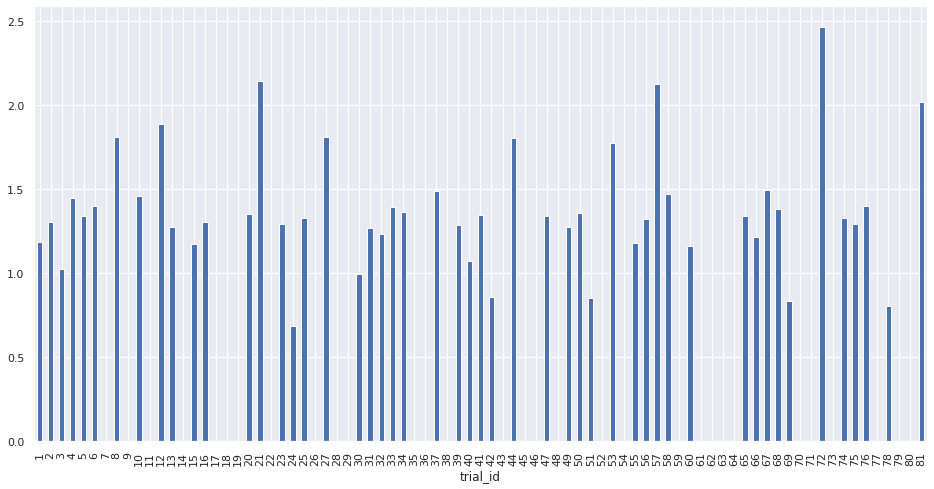

In [ ]:
metric2.plot.bar(figsize=(16, 8))

In [ ]:
metric2.mean()

1.3761398298173833

## Metric 3 - Battery

In [ ]:
battery = trial_run_df[trial_run_df.end_state == "low-battery"]
battery.groupby("trial_id")["end_state"].count()

trial_id
3     1
6     1
9     4
17    2
18    2
59    1
64    1
Name: end_state, dtype: int64

In [ ]:
planned_battery = battery[battery.treatment == "planned"].groupby("trial_id")["end_state"].value_counts()
planned_battery

trial_id  end_state  
3         low-battery    1
9         low-battery    4
17        low-battery    2
18        low-battery    2
Name: end_state, dtype: int64

In [ ]:
baseline_battery = battery[battery.treatment == "baseline"].groupby("trial_id")["end_state"].value_counts()
baseline_battery

trial_id  end_state  
6         low-battery    1
59        low-battery    1
64        low-battery    1
Name: end_state, dtype: int64

In [ ]:
metric3 = len(planned_battery) / len(baseline_battery)
metric3

1.3333333333333333